<h1>DAPS 20/21 Final Assignment</h1>
<p>This jupyter notebook presents the code used to complete the final assignment for module ELEC0136: Data Acquisiton and Processing systems. It is understood best when read in conjunction with the submitted report.</p>

<p>The company chosen for this assignment was <strong>Apple (AAPL).</strong></p>

<h2>Importing Required Modules</h2>

In [1]:
# Standard modules
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# yfinance - python wrapper for yahoo finance used to get stock market data
import yfinance as yf

# nltk and textblob - NLP (natural language processing) libraries used for sentiment analysis
import nltk
from textblob import TextBlob

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn import preprocessing

/Users/Szymon/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h2>1. Data Acquisition and Storage</h2>
<p>The first section of this notebook will focus on how the data was acquired and stored</p>

<h3>Apple Stock Market Price</h3>
<p>The stock market price of Apple from the 01/04/2017, up to the 22/01/2021 was acquired using the yfinance module.</p>

In [2]:
apple = yf.Ticker('AAPL')
aapl_stock = apple.history(start="2017-04-01", end="2021-01-22", interval='1d')
aapl_stock.to_pickle('apple_stock.pkl')
aapl_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-03-31,34.176285,34.307075,34.007447,34.162018,78646800,0.0,0.0
2017-04-03,34.173901,34.271395,34.016953,34.171520,79942800,0.0,0.0
2017-04-04,34.064522,34.454510,34.045498,34.425976,79565600,0.0,0.0
2017-04-05,34.295182,34.590053,34.197684,34.247623,110871600,0.0,0.0
2017-04-06,34.311828,34.366524,34.112079,34.162018,84596000,0.0,0.0


In [3]:
aapl_stock.shape

(959, 7)

<p>We will also acquire the S&P 500 market index, which measures the stock performance of 500 large companies listed on stock exchanges in the United States. This will give us a general view of how the market is doing.</p>

In [4]:
snp = yf.Ticker('SPY')
snp_stock = snp.history(start="2017-04-01", end="2021-01-22", interval='1d')
snp_stock.to_pickle('snp_stock.pkl')
snp_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-03-31,219.733695,220.301892,219.528771,219.584671,73733100,0.0,0
2017-04-03,219.640566,219.854800,217.880089,219.202774,85546500,0.0,0
2017-04-04,218.895382,219.435636,218.485533,219.342484,56466200,0.0,0
2017-04-05,220.069031,221.121597,218.466902,218.690460,108800600,0.0,0
2017-04-06,218.839487,219.864095,218.364428,219.305222,69135800,0.0,0


In [5]:
snp_stock.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object

In [ ]:
# Loading the data from pkl files if the above hasn't worked
snp_stock = pd.read_pickle('snp_stock.pkl')
appl_stock = pd.read_pickle('apple_stock.pkl')

<h3>'Bullish' and 'Bearish' Google Trends Data</h3>
<p>Two data sets from google trends on search trends related to both 'bullish' and 'bearish' keywords was collected. The trend data was localized to the United States.</p>
<p>The terms used for bullish trend data were: 'buy stocks', 'how to buy stocks', 'top stocks' and 'how to invest'. The terms used for bearish trend data were: 'sell stocks', 'how to sell stocks', and 'how to short sell'.</p>

In [6]:
bullish = pd.read_csv('bullish.csv', header=2)
bullish.head()

,Week,buy stocks: (United States),how to buy stocks: (United States),top stocks: (United States),how to invest: (United States)
0,02/04/2017,9,2,3,6
1,09/04/2017,8,1,3,7
2,16/04/2017,9,1,3,7
3,23/04/2017,8,2,3,7
4,30/04/2017,8,1,3,7


In [7]:
bearish = pd.read_csv('bearish.csv', header=2)
bearish.tail()

,Week,sell stocks: (United States),how to sell stocks: (United States),how to short sell: (United States)
194,20/12/2020,28,8,1
195,27/12/2020,44,9,3
196,03/01/2021,48,15,4
197,10/01/2021,63,14,4
198,17/01/2021,56,11,6


In [8]:
bullish.shape

(199, 5)

In [9]:
bearish.dtypes

Week                                   object
sell stocks: (United States)            int64
how to sell stocks: (United States)     int64
how to short sell: (United States)      int64
dtype: object

<h3>News Outlet Tweets</h3>
<p>The original dataset contains the tweet id's from the Twitter accounts of aproximately 4,500 worldwide news outlets, i.e., accounts of media organizations intended to disseminate news. The full dataset under "News Outlets", can be found here: </p>

[TweetSets Website](https://tweetsets.library.gwu.edu/datasets)

<p>The downloaded dataset (the file: <strong>'tweet-ids-004.txt'</strong>) corresponds only to original or retweeted tweets that are dated from 01/04/2017 to 13/05/2020. It is meant to be 200,000 tweets, however some will be from now suspended accounts, and so the final dataset is a bit smaller. This specific dataset can be found under this link:</p> 

[http://tweetsets.library.gwu.edu/dataset/b8066f0e](http://tweetsets.library.gwu.edu/dataset/b8066f0e)

<strong>IMPORTANT</strong>
<p>The dataset only provides a text file of tweet id's. Using the twitter API and a python wrapper for it, tweepy, API requests were made to retrieve a 'tweet' object associated with each of the tweet id's. These results were converted to json format, which was then convereted to a dataframe and pickled. This script can be found in the './code' folder, under the name <strong>'tweet_extractor.py'.</strong></p>
<p> The result of this script produces the file <strong>'processed_tweets.pkl'</strong>. This is the file that is included with the submission, and is used from here on out.</p>

In [10]:
# Takes a while
tweets_df = pd.read_pickle("./processed_tweets.pkl")
tweets_df.head()

,created_at,full_text,id_str,lang,popularity
0,2017-04-01,Colombia: At least 100 dead after flooding sen...,848224134228303872,en,0
1,2017-04-01,Ivanka Trump and Jared Kushner are worth as mu...,848011224365314048,en,27
2,2017-04-01,Watch Facebook Live: @a_hammerschlag is live f...,847976929328336896,en,0
3,2017-04-01,The latest unemployment numbers ... https://t....,848127907222478848,en,0
4,2017-04-01,Round Dance to raise money for missing teen ht...,848075785370034176,en,0


In [11]:
tweets_df.shape

(192243, 5)

<h2>2. Data Preprocessing/Cleaning</h2>
<p>Having covered the data acquistion and storage stage, we now move to cleaning and preprocessing each of the datasets to to ensure consistency.</p>

<h3>Apple Stock Data</h3>
<p>Loading and cleaning the AAPL stock data. We can remove the dividends and stock split columns, as they are not needed for our analysis. We can also reset the index of the dataframe, to retain the dates in a seperate column. Additionally, we need to convert each of the columns into an appropriate data type.</p>

In [12]:
aapl = pd.read_pickle("./apple_stock.pkl")

# Converting the price columns to appropriate type
for i in ['Open', 'High', 'Close', 'Low']:
    aapl[i]  =  aapl[i].astype('float64')

aapl = aapl.drop(columns=['Dividends', 'Stock Splits'])

<p>We also add a 'Daily Returns%' column, which shows the percent change in the closing price after each day of trading. We also add a returns column, which shows the returns on the stock on every day since the first entry in the dataframe. It just shows how much your stock gew by (ie, if returns is 2, your stock doubled)</p>

In [13]:
aapl['Daily Returns'] = aapl['Close'].pct_change()
aapl['Returns'] = aapl['Close']/aapl['Close'][0]

aapl.head()

,Open,High,Low,Close,Volume,Daily Returns,Returns
Date,,,,,,,
2017-03-31,34.176285,34.307075,34.007447,34.162018,78646800,NaN,1.000000
2017-04-03,34.173901,34.271395,34.016953,34.171520,79942800,0.000278,1.000278
2017-04-04,34.064522,34.454510,34.045498,34.425976,79565600,0.007446,1.007727
2017-04-05,34.295182,34.590053,34.197684,34.247623,110871600,-0.005181,1.002506
2017-04-06,34.311828,34.366524,34.112079,34.162018,84596000,-0.002500,1.000000


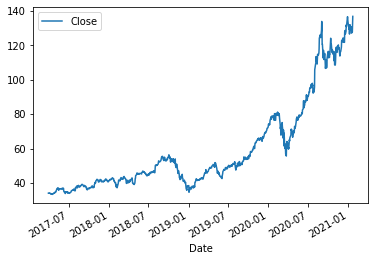

In [14]:
aapl.plot(y='Close')

In [15]:
aapl.describe()

,Open,High,Low,Close,Volume,Daily Returns,Returns
count,959.000000,959.000000,959.000000,959.000000,9.590000e+02,958.000000,959.000000
mean,59.704315,60.392616,59.049426,59.751328,1.295212e+08,0.001659,1.749057
std,26.811843,27.250367,26.334115,26.806089,5.860835e+07,0.020458,0.784675
min,33.581793,33.738743,33.305943,33.453377,4.544800e+07,-0.128647,0.979256
25%,41.485381,41.800023,41.027386,41.393307,8.900290e+07,-0.006884,1.211676
50%,49.126039,49.480164,48.706679,49.172436,1.136056e+08,0.001253,1.439389
75%,69.702008,70.653001,69.092048,70.282135,1.529234e+08,0.011329,2.057318
max,138.050003,139.669998,134.339996,136.869995,4.268848e+08,0.119808,4.006496


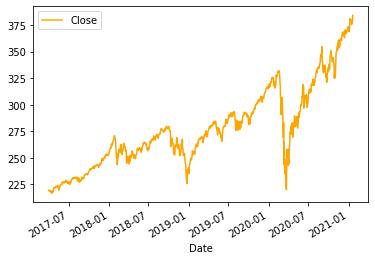

In [16]:
# We will do the same to the s&p 500
snp = pd.read_pickle("./snp_stock.pkl")

# Converting the price columns to appropriate type
for i in ['Open', 'High', 'Close', 'Low']:
    snp[i]  =  snp[i].astype('float64')

snp = snp.drop(columns=['Dividends', 'Stock Splits'])
snp['Daily Returns'] = snp['Close'].pct_change()
snp['Returns'] = snp['Close']/snp['Close'][0]

snp.plot(y='Close', c='orange')

<h3>Google Trends Data</h3>
<p>The week value must be converted from a string to a datetime object. The trends data for bearish and bullish keywords can also be converted to a single value in each dataset.</p>

In [17]:
bullish['Week'] = pd.to_datetime(bullish['Week'], format='%d/%m/%Y')
bearish['Week'] = pd.to_datetime(bearish['Week'], format='%d/%m/%Y')

In [18]:
# Setting index to datetime
bullish = bullish.set_index('Week')
bearish = bearish.set_index('Week')

In [19]:
bullish['Total'] = bullish.sum(axis=1)
bearish['Total'] = bearish.sum(axis=1)

bullish

,buy stocks: (United States),how to buy stocks: (United States),top stocks: (United States),how to invest: (United States),Total
Week,,,,,
2017-04-02,9,2,3,6,20
2017-04-09,8,1,3,7,19
2017-04-16,9,1,3,7,20
2017-04-23,8,2,3,7,20
2017-04-30,8,1,3,7,19
...,...,...,...,...,...
2020-12-20,25,4,5,12,46
2020-12-27,30,4,7,15,56
2021-01-03,40,6,9,20,75


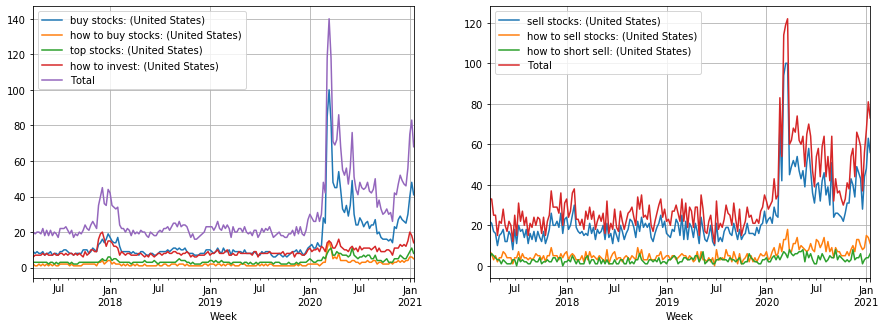

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

bullish.plot(ax=ax[0])
bearish.plot(ax=ax[1])

ax[0].grid()
ax[1].grid()
plt.show()

<p>Google trend data is normalized with respect to all the keywords used in the search. This means that these two datasets are not scaled appropriately with respect to each other. We can create a dataframe with both the bearish and bullish trend data, each of them scaled seperately to be from 0-100. That way, we can plot them together.</p>

In [21]:
# The two values we want to min-max scale in between
a, b = 0, 100

# Adding bullish_trend to bullish data
x, y = bullish.Total.min(), bullish.Total.max()
bullish['Bullish_Trend'] = (bullish.Total - x) / (y - x) * (b - a) + a

# Adding bearish_trend to bearish data
x, y = bearish.Total.min(), bearish.Total.max()
bearish['Bearish_Trend'] = (bearish.Total - x) / (y - x) * (b - a) + a

In [22]:
gtrends = bullish[['Bullish_Trend']].copy()
gtrends['Bearish_Trend'] = bearish['Bearish_Trend']
gtrends

,Bullish_Trend,Bearish_Trend
Week,,
2017-04-02,3.225806,19.819820
2017-04-09,2.419355,19.819820
2017-04-16,3.225806,12.612613
2017-04-23,3.225806,12.612613
2017-04-30,2.419355,3.603604
...,...,...
2020-12-20,24.193548,23.423423
2020-12-27,32.258065,40.540541
2021-01-03,47.580645,50.450450


<Figure size 432x288 with 0 Axes>

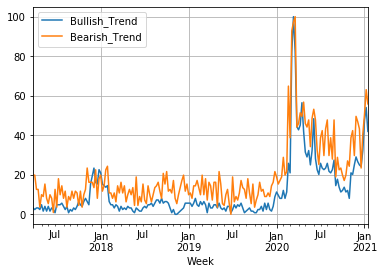

In [23]:
fig = plt.figure()
gtrends.plot(y=['Bullish_Trend', 'Bearish_Trend'])
plt.grid()
plt.show()

<h3>Twitter Data</h3>
<p><strong>The data we have now is after the result of running the 'tweet_extractor.py' file, and then the 'twitter_data_cleaning' notebook. That notebook should be referred to when it comes to cleaning the data. </strong></p>

In [24]:
tweets_df.head()

,created_at,full_text,id_str,lang,popularity
0,2017-04-01,Colombia: At least 100 dead after flooding sen...,848224134228303872,en,0
1,2017-04-01,Ivanka Trump and Jared Kushner are worth as mu...,848011224365314048,en,27
2,2017-04-01,Watch Facebook Live: @a_hammerschlag is live f...,847976929328336896,en,0
3,2017-04-01,The latest unemployment numbers ... https://t....,848127907222478848,en,0
4,2017-04-01,Round Dance to raise money for missing teen ht...,848075785370034176,en,0


<h4>Analyzing Tweet Sentiment</h4>
<p>The reason for preserving the full text of each tweet, is the ability to perform sentiment analysis, and use its score as a feature. This can be done using the TextBlob library. Not all tweets in the dataset are in english however... There exist libraries which use the google translate API to translate texts, however, this would require the translation of thousands of tweets, which complicates things as the daily API rate limit is not very high. Perhaps more importantly, sentiment analyses of translated texts tends to also be less accurate.</p>

In [25]:
# All the unique languages in the tweets
tweets_df.lang.unique()

array(['en', 'fr', 'es', 'sv', 'in', 'et', 'hi', 'de', 'ca', 'ja', 'it',
       'ro', 'nl', 'und', 'cy', 'pt', 'da', 'pl', 'tl', 'fi', 'ht', 'ko',
       'no', 'tr', 'el', 'hu', 'zh', 'ru', 'cs', 'lv', 'ka', 'ur', 'ar',
       'eu', 'mr', 'ta', 'gu', 'ml', 'hy', 'te', 'pa', 'is', 'kn', 'lt',
       'th', 'ne', 'sl', 'or', 'uk', 'bn', 'si'], dtype=object)

In [26]:
# Removing all rows where language is not english
tweets_df = tweets_df[tweets_df.lang == 'en']
tweets_df.reset_index()
tweets_df.shape

(184514, 5)

In [32]:
# Loop to analyze tweet sentiments - takes a while
pols = []
subj = []
count = 0
print('Analyzing Sentiment...\n')
for i in tweets_df['full_text']:
    result = TextBlob(i)
    pols.append(result.sentiment.polarity)
    subj.append(result.sentiment.subjectivity)
    count += 1
    if count % 100 ==0:
        print('\rDone tweet #: ', count, end="", flush=True)

Analyzing Sentiment...

Done tweet #:  1845000 2000 4900 5800 6100 7800 14000 14200 16700 18600 19100 19200 23600 28200 30400 33200 38100 40600 47400 47500 48800 49700 49900 50700 50800 5590056300 56500 57500 58800 63000 63900 64500 70500 72000 72900 74000 74100 75400 78000 79100 79400 8740087800 89500 89600 89800 91400 95200 95300 97800 99000 101800 101900 103600 103800 114600 115200 123400 124400 130800 131500 136000 138200 140100 144700 147800 150300 152700 152900 154300 160000 160100 161200 163500 166100 166500 170100 170200 171600 171700 175500 175600 175800 181900

In [33]:
# Adding columns - takes a while
tweets_df['polarity'] = pols
tweets_df['subjectivity'] = subj

# Show some positive tweets
tweets_df[tweets_df['polarity'] == 1].head()

,created_at,full_text,id_str,lang,popularity,polarity,subjectivity
57,2017-04-02,Want to add flavor to your food? Your garden m...,848646222566969344,en,1,1.0,1.0
211,2017-04-04,Let's try this again today...\nHappy @whitesox...,849207211113017344,en,8,1.0,1.0
235,2017-04-05,"Happy #NationalWalkingDay! 👟🚶‍♀️🚶 Lace up, gra...",849589576213639168,en,5,1.0,1.0
256,2017-04-05,The Samsung Galaxy S8's display is the best yo...,849464113688444928,en,20,1.0,0.3
274,2017-04-05,9 pictures of The Masters' delicious food guar...,849604492513464320,en,29,1.0,1.0


[Text(0, 0.5, 'Density')]

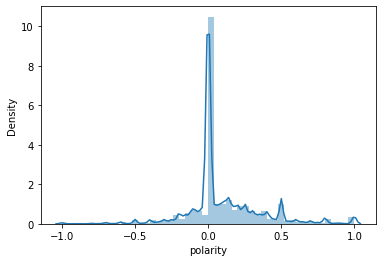

In [34]:
# This plot shows that most tweets are neutral
ax = sns.distplot(tweets_df['polarity'])
ax.set(ylabel='Density')

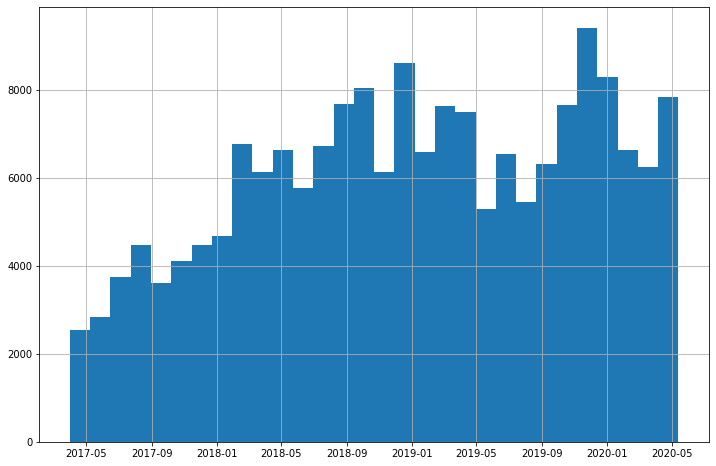

In [35]:
fig = plt.figure(figsize=(12,8))
tweets_df['created_at'].hist(bins=30)

In [36]:
# Currently, the data contains a lot of tweets per day. Ideally, we want to resample the data to make it daily.
# Then, we can take the mean of the popularity, polarity, and subjectivity of each day

# Copying data
twitter = tweets_df.copy()

# Setting index to datetime
twitter = twitter.set_index('created_at')

# Using only popularity, polarity and subjectivity
twitter = twitter.drop(['full_text', 'id_str', 'lang'], axis=1)

# Resampling to a daily dataset, summing each day
data_columns = ['popularity', 'polarity', 'subjectivity']
daily_twitter = twitter[data_columns].resample('d').sum()

# Checks to see if any dates are missing
pd.date_range(start = '2017-04-01', end = '2020-05-13' ).difference(daily_twitter.index)

daily_twitter.head()

,popularity,polarity,subjectivity
created_at,,,
2017-04-01,208,1.545725,12.046014
2017-04-02,271,3.652381,11.882143
2017-04-03,1027,6.780590,15.764926
2017-04-04,44468,6.871267,21.319722
2017-04-05,4054,8.548690,22.117579


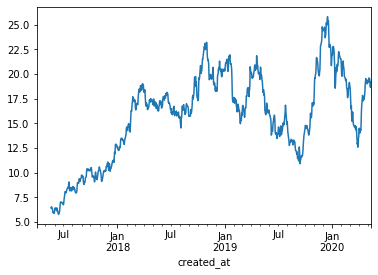

In [37]:
# Plotting 50 day moving average of the polarity metric
daily_twitter['polarity'].rolling(50).mean().plot()

<h2>3. Initial Data Exploration</h2>
<p>Having cleaned up the data, and created some additional features, we can now explore each dataset in more depth.</p>

<h3>3.1 Apple and S&P 500</h3>
<p>Having cleaned the stock data, and google trends data, we can now explore their correlation.</p>

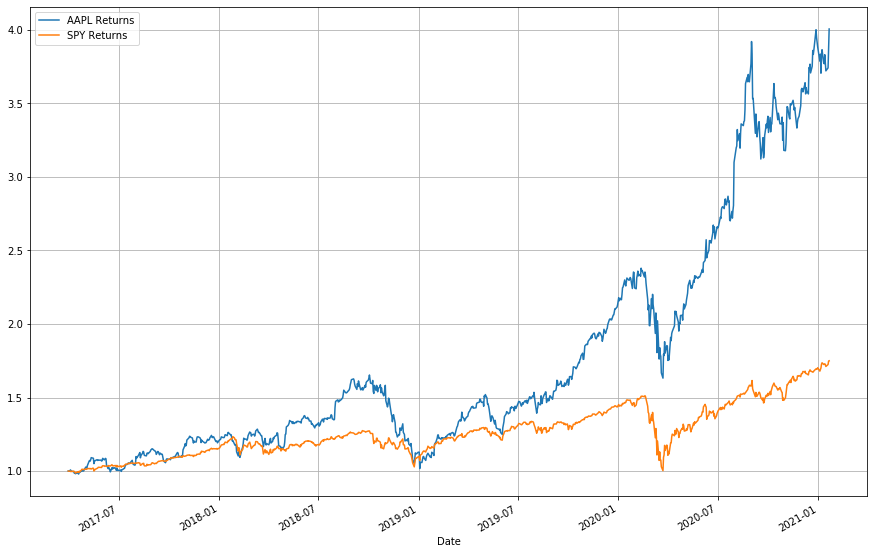

In [38]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,10))

aapl.plot(y='Returns', ax=ax)
snp.plot(y='Returns', ax=ax)

ax.grid()
ax.legend(['AAPL Returns', 'SPY Returns'])
plt.show()

<h4>Apple and S&P 500 Trend and Correlation</h4>
<p>From the graph, it is visible that both AAPL and SPY have an overall upwards trend. We can compute a correlation metric using the numpy corrcoef function. A value of +1 suggest a strong positive correlation, while -1 suggest a strong negative correlation. As is shown below, AAPL stock performance and the S&P 500 are highly correlated, as expected.</p>

In [39]:
x = aapl['Returns']
y = snp['Returns']

# Returns a matrix of correlation of x-x, x-y, y-x, y-y
np.corrcoef(x,y)

array([[1.        , 0.92101746],
       [0.92101746, 1.        ]])

[Text(0, 0.5, 'Density')]

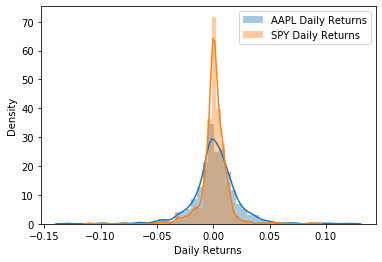

In [40]:
# This plot shows that AAPL stock is more extreme in regards to its daily returns
# SPY being an index of the top 500 companies shows a more centered daily return
ax = sns.distplot(aapl['Daily Returns'][1:])
sns.distplot(snp['Daily Returns'][1:])
ax.legend(['AAPL Daily Returns', 'SPY Daily Returns'])

ax.set(ylabel='Density')

In [41]:
# Seasonality
# Copying data
month_year_snp = snp.copy()

# Using only daily returns
month_year_snp = month_year_snp['Daily Returns']

# Making it a datafrmae
month_year_snp = pd.DataFrame(month_year_snp)

month_year_snp.loc[:,'year'] = month_year_snp.index.year
month_year_snp.loc[:,'month'] = month_year_snp.index.month
month_year_snp = month_year_snp.groupby(['year','month']).mean().unstack()
month_year_snp.columns = month_year_snp.columns.droplevel(0)

month_year_snp = month_year_snp.drop(2021)
month_year_snp 


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,NaN,NaN,NaN,0.000531,0.000648,0.000299,0.001024,0.000143,0.001003,0.001064,0.001443,0.000609
2018,0.002628,-0.001801,-0.001246,0.000301,0.001113,0.000287,0.001747,0.001376,0.000318,-0.003015,0.000942,-0.004672
2019,0.003737,0.001693,0.000881,0.001916,-0.002950,0.003390,0.000696,-0.000666,0.000978,0.000983,0.001786,0.001375
2020,0.000009,-0.004212,-0.004509,0.006015,0.002425,0.000959,0.002637,0.003231,-0.001702,-0.001068,0.005226,0.001669


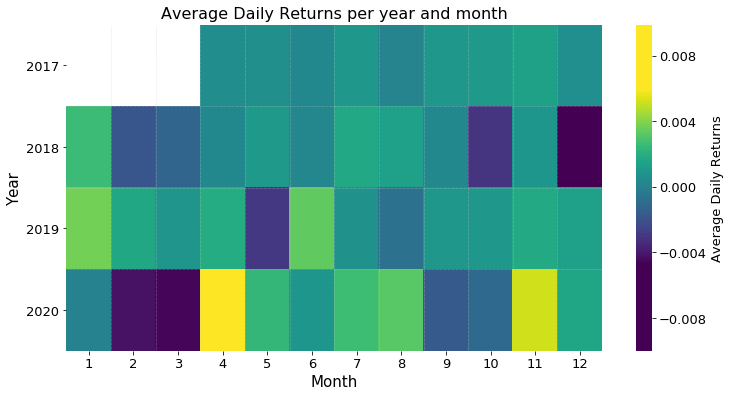

In [42]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(month_year_snp, ax=ax, cmap=plt.cm.viridis, cbar_kws={'boundaries':np.arange(-0.01,0.01,0.0001)})

cbax = f.axes[1]
[l.set_fontsize(13) for l in cbax.yaxis.get_ticklabels()]
cbax.set_ylabel('Average Daily Returns', fontsize=13)

[ax.axhline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 7)]
[ax.axvline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 24)];

ax.set_title('Average Daily Returns per year and month', fontsize=16)

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Year', fontsize=15)
ax.set_yticklabels(np.arange(2017, 2021, 1), rotation=0);

<h3>3.2 Google Trends and Stock Price</h3>
<p>Now that we ave Bullish and Bearish trend data, we can plot the difference between the two for a basic 'sentiment' metric. The steeper the gradient, the more people are looking to invest in the market, and vice versa. A moving average also helps to smooth out random noise.</p>

<Figure size 432x288 with 0 Axes>

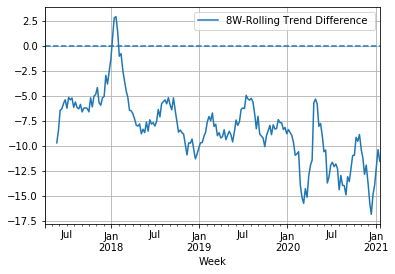

In [43]:
# A moving avereage measure of the difference - signifying downards or upwards trend
gtrends['Difference'] = gtrends['Bullish_Trend'] - gtrends['Bearish_Trend']
gtrends['Rolling_Difference'] = gtrends['Difference'].rolling(8).mean()

# A moving avereage measure of the difference - regardless of magnitude
gtrends['Absolute_Difference'] = gtrends['Difference'].abs()
gtrends['Absolute_Difference_Rol'] = gtrends['Absolute_Difference'].rolling(8).mean()

# This data is weekly, we can upsample it to be daily
gtrends = gtrends.resample('1d')
gtrends = gtrends.interpolate(method='time')

fig = plt.figure()
gtrends.plot(y='Rolling_Difference')
plt.axhline(y=0, ls='--')
plt.legend(['8W-Rolling Trend Difference '])

plt.grid()
plt.show()

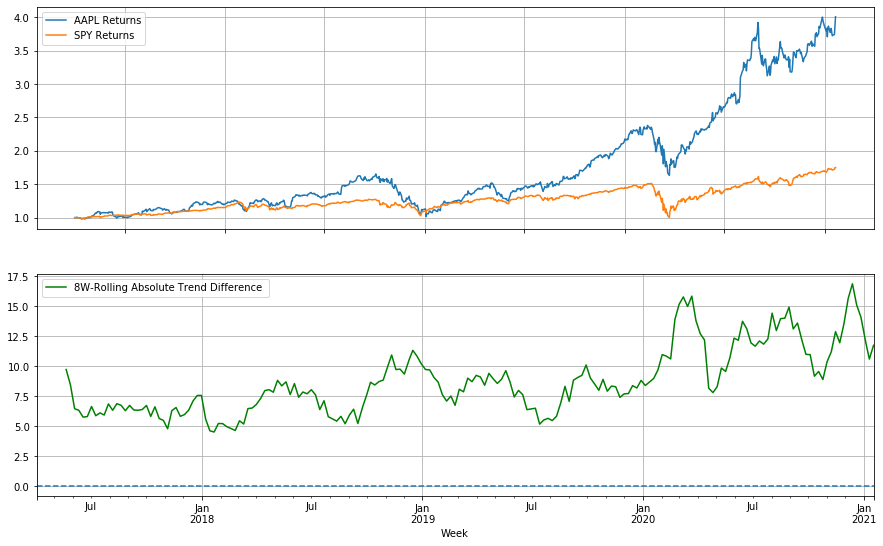

In [59]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,10))

aapl.plot(y='Returns', ax=ax[0])
snp.plot(y='Returns', ax=ax[0])

gtrends.plot(y=['Absolute_Difference_Rol'], ax=ax[1], c='g')

ax[0].grid()
ax[0].set_xticklabels(labels="")
ax[0].set_xlabel(xlabel="")
ax[0].legend(['AAPL Returns', 'SPY Returns'])

ax[1].legend(['8W-Rolling Absolute Trend Difference '])
ax[1].grid()
ax[1].axhline(y=0, ls='--')

plt.show()

In [45]:
# Maybe google trends corresponds more with the volume of stock traded?

# Adding 20-day moving average of volume
aapl['Rolling_Volume'] = aapl['Volume'].rolling(20).mean()
snp['Rolling_Volume'] = snp['Volume'].rolling(20).mean()

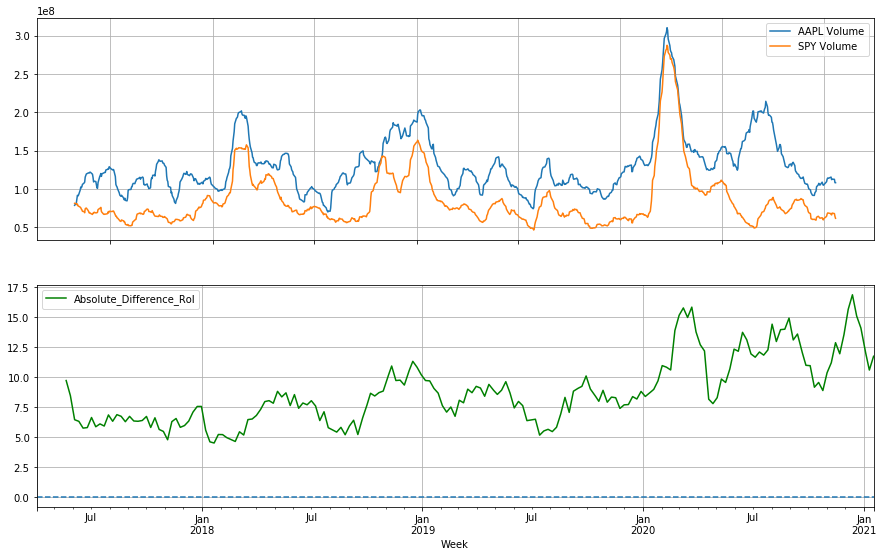

In [57]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,10), sharex=False)

aapl.plot(y='Rolling_Volume', ax=ax[0])
snp.plot(y='Rolling_Volume', ax=ax[0])

gtrends.plot(y=['Absolute_Difference_Rol'], ax=ax[1], c='g')

ax[0].set_xticklabels(labels="")
ax[0].set_xlabel(xlabel="")
ax[0].grid()
ax[0].legend(['AAPL Volume', 'SPY Volume'])

ax[1].grid()
ax[1].axhline(y=0, ls='--')

plt.show()

In [47]:
# Correlation metrics for the S&P 500 and google trends
a = snp.copy()
b = gtrends.copy()

# Dropping all NaNs
a = a.dropna()
b = b.dropna()

# Reindexing a with googletrends weekly index
a = a.reindex(b.index, method='ffill')

x = a['Returns']
y = b['Absolute_Difference_Rol']

# Returns a matrix of correlation of x-x, x-y, y-x, y-y
np.corrcoef(x,y)

array([[1.        , 0.60909437],
       [0.60909437, 1.        ]])

In [48]:
# Correlation metrics for AAPL and google trends
a = aapl.copy()
b = gtrends.copy()

# Dropping all NaNs
a = a.dropna()
b = b.dropna()

# Reindexing a with googletrends weekly index
a = a.reindex(b.index, method='ffill')

x = a['Returns']
y = b['Absolute_Difference_Rol']

# Returns a matrix of correlation of x-x, x-y, y-x, y-y
np.corrcoef(x,y)

array([[1.       , 0.7293541],
       [0.7293541, 1.       ]])

<p><strong>Interesting.</strong> It appears AAPL (0.73 correlation) and SPY (0.6 correlation) stock both have a rather strong correlation metric with the absolute difference in bullish and bearish trend data. This suggests that heavy google traffic in either direction does in fact coincide with stock movement. In fact, on the graphs, it can be seen how stock crashes (such as December 2018 and Jan-Feb of 2020) are quite significantly mirrored in the google trend data. )</p>

<h3>3.3 Twitter, Google and Stock Data</h3>
<p>Having shown correlation between AAPL and the S&P 500, as well as their stock prices and google trends data, we can now turn to comparing this all to Twitter.</p>

In [49]:
daily_twitter.tail()

,popularity,polarity,subjectivity
created_at,,,
2020-05-09,66,-0.575000,1.325000
2020-05-10,526448,29.654531,53.372015
2020-05-11,10941,44.408914,118.358611
2020-05-12,240,2.768452,6.354365
2020-05-13,1275,6.489843,18.096764


In [50]:
# First, we must reindex the twitter data to much our stock data
tweet_cut = daily_twitter.copy()
aapl_cut = aapl.copy()
snp_cut = snp.copy()
gtrends_cut = gtrends.copy()

# Our twitter data begins on 2017-04-01, and ends 2020-05-13
# Our stock data begin on 2017-03-31, and ends 2021-01-21
# We are looking to predict price until the end of may.
# We need to cut our stock data down before reindexing
aapl_cut = aapl_cut['2017-04-03':'2020-05-13']
snp_cut = snp_cut['2017-04-03':'2020-05-13']
# Lets cut the google trends data down too 
gtrends_cut = gtrends['2017-04-03':'2020-05-13']

# Reindexing a with googletrends weekly index
tweet_cut = tweet_cut.reindex(aapl_cut.index, method='ffill')


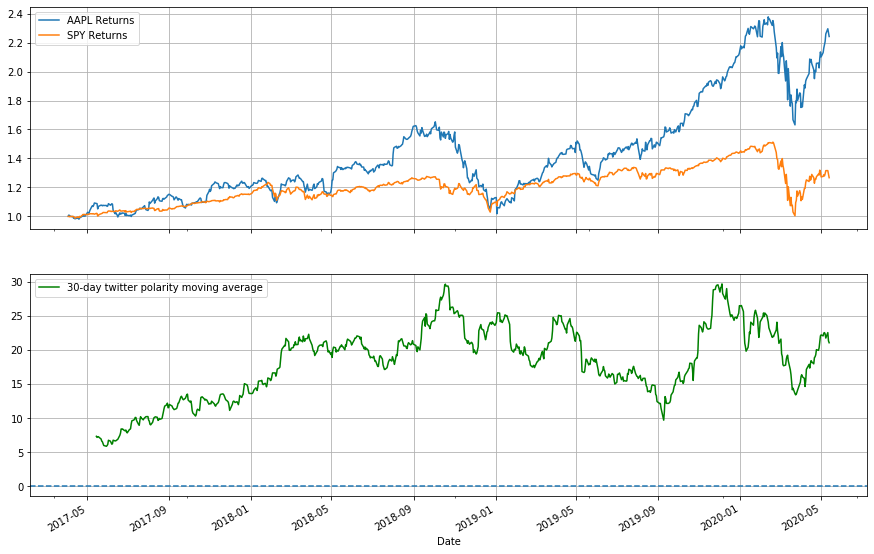

In [60]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,10), sharex=True)

aapl_cut.plot(y='Returns', ax=ax[0])
snp_cut.plot(y='Returns', ax=ax[0])

tweet_cut['polarity'].rolling(30).mean().plot(ax=ax[1], c='g')

#ax[0].set_xticklabels(labels="")
#ax[0].set_xlabel(xlabel="")
ax[0].grid()
ax[0].legend(['AAPL Returns', 'SPY Returns'])

ax[1].legend(['30-day twitter polarity moving average'])
ax[1].grid()
ax[1].axhline(y=0, ls='--')

plt.show()

In [52]:
# Correlation metric for S&P 500 stock and twitter polarity 40-day moving average

x = tweet_cut['polarity'].rolling(30).mean()
y = snp_cut['Returns']

# Dropping NaN
x = x.dropna()

# Can just reindex the stock data to this reduced moving average of polarity
y = y.reindex(x.index, method='ffill')

np.corrcoef(x,y)

array([[1.        , 0.58165902],
       [0.58165902, 1.        ]])

In [53]:
# Correlation metric for AAPL stock and twitter polarity 40-day moving average

x = tweet_cut['polarity'].rolling(30).mean()
y = aapl_cut['Returns']

# Dropping NaN
x = x.dropna()

# Can just reindex the stock data to this reduced moving average of polarity
y = y.reindex(x.index, method='ffill')

np.corrcoef(x,y)

array([[1.        , 0.50971705],
       [0.50971705, 1.        ]])

<h2>4. Data Inference</h2>
<p>At this point, we have some convincing features from both google trends and twitter. We can try to predict future stock price with them.</p>

<p>Using stocks and our external datasets</p>

In [67]:
# Adding features
final_data = aapl_cut['Close']
final_data = pd.DataFrame(final_data)

final_data['polarity_30'] = tweet_cut['polarity'].rolling(30).mean()
final_data['absolute_diff_8'] = gtrends_cut['Absolute_Difference_Rol']

# The moving averages of polarity and googl_trend introduced a lot of NaN rows. We can drop these
final_data = final_data.dropna()
final_data.tail()

,Close,polarity_30,absolute_diff_8
Date,,,
2020-05-07,75.463509,22.349364,9.169754
2020-05-08,77.259674,21.742512,9.391347
2020-05-11,78.475372,22.542035,9.794313
2020-05-12,77.578537,21.329271,9.754095
2020-05-13,76.641853,21.054884,9.713876


In [68]:
# Lets try linear regression first
# Train-test split

train = final_data[:'2020-03-30']
test = final_data['2020-04-01':]

x_train = train.drop(['Close'], axis=1)
y_train = train['Close']

x_test = test.drop('Close', axis=1)
y_test = test['Close']

In [69]:
model = KernelRidge()
model.fit(x_train, y_train)

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [70]:
# Predictions
preds = model.predict(x_test)
preds

array([62.16097801, 62.01822437, 61.16427136, 59.66999881, 57.93451403,
       58.71471813, 60.6321898 , 59.05394061, 56.56751606, 55.53689115,
       54.32735879, 52.30882886, 48.15994158, 49.13031953, 49.13906954,
       49.34585876, 50.12460513, 49.88085481, 50.56672206, 51.92274044,
       53.23569282, 53.63315511, 54.59616313, 55.80195982, 56.59863839,
       57.04732705, 56.97846014, 59.25494124, 57.59791651, 57.12513328])

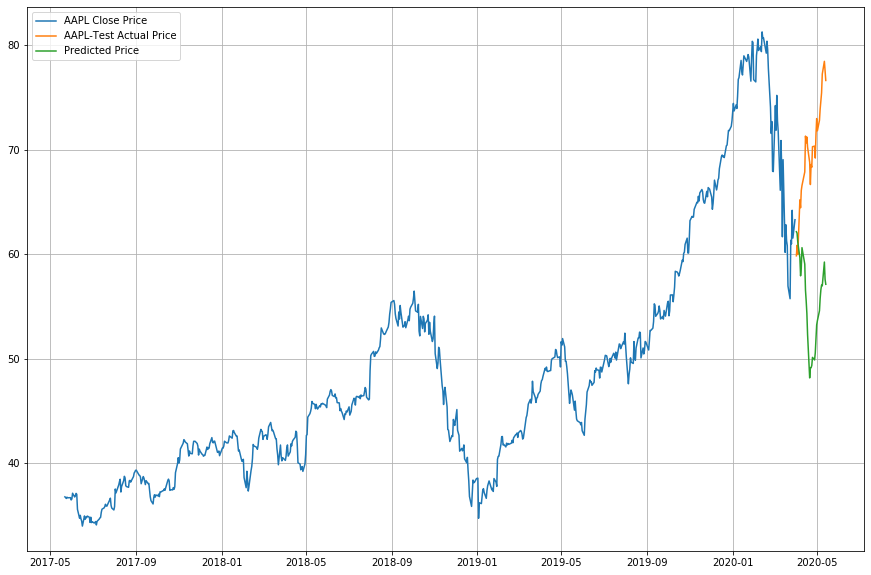

In [85]:
pred_plot = test.copy()
pred_plot['Predictions'] = preds

fig = plt.figure(figsize=(15,10))
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(pred_plot['Predictions'])
plt.grid()
plt.legend(['AAPL Close Price', 'AAPL-Test Actual Price', 'Predicted Price'])

In [ ]:
tweets_df